In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_folder = './data'
data_file = 'cleaned_data.parquet'


In [3]:
#read data
cars_data = pd.read_parquet(os.path.join(data_folder, data_file))

numerical_columns = ['price', 'year', 'yearSquared', 'odometer', 'logOdometer', 'cylinders']
categorical_columns = cars_data.columns[6:]

In [4]:
cars_data[numerical_columns].iloc[:100].shape
print(['price']+(categorical_columns.to_list()))

['price', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen', 'manufacturer_volvo', 'm

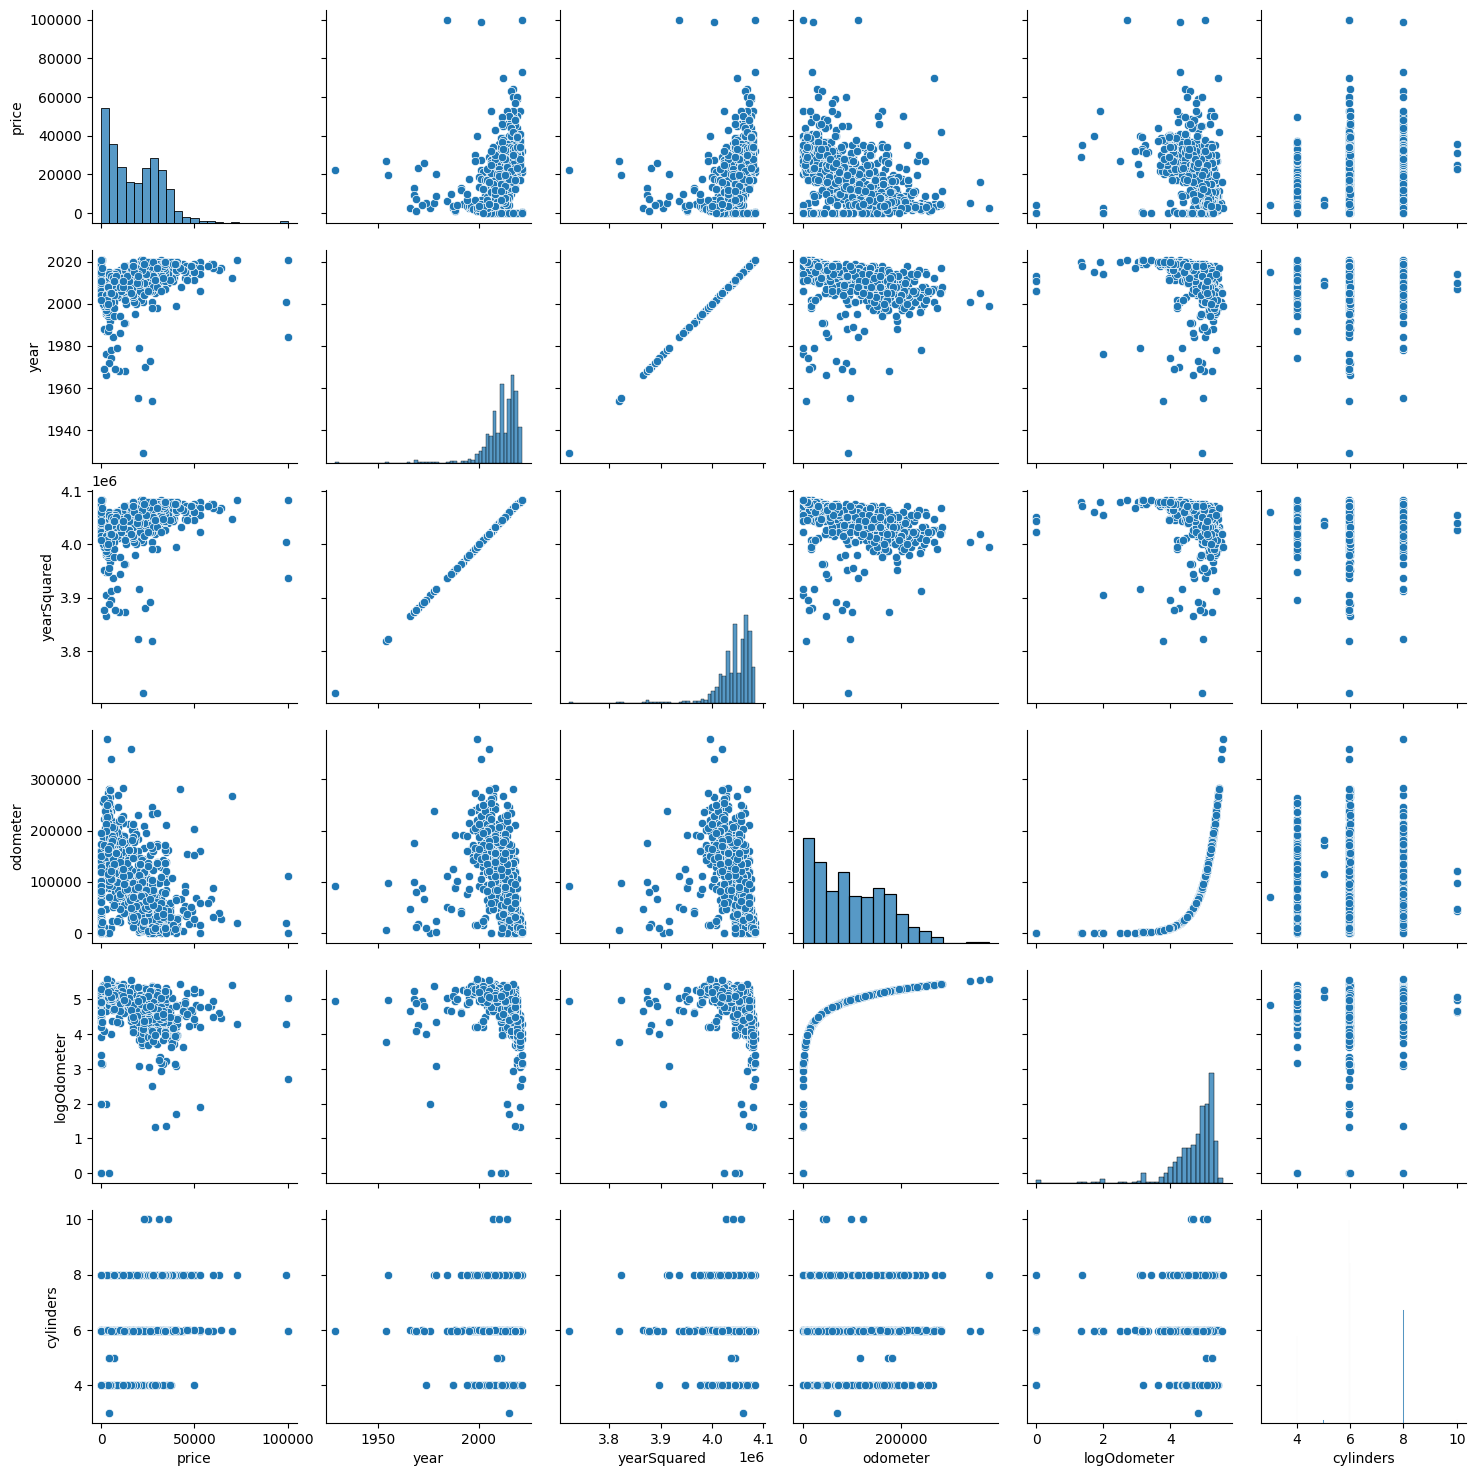

In [5]:
sns.pairplot(cars_data[numerical_columns].iloc[:1000])
plt.show()

10816


(array([3516., 2076., 1851., 1213.,  812.,  342.,  134.,   37.,   13.,
           6.]),
 array([1.000000e+00, 4.000090e+04, 8.000080e+04, 1.200007e+05,
        1.600006e+05, 2.000005e+05, 2.400004e+05, 2.800003e+05,
        3.200002e+05, 3.600001e+05, 4.000000e+05]),
 <BarContainer object of 10 artists>)

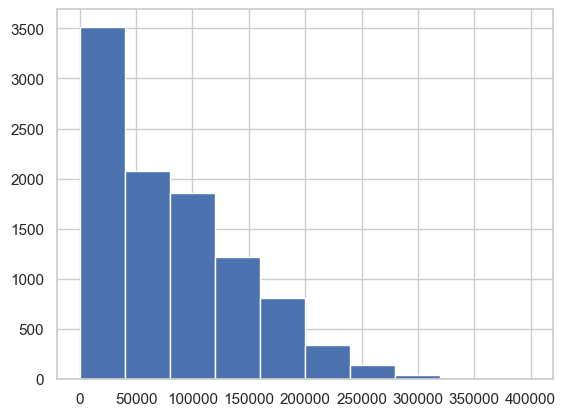

In [8]:
sns.set_theme(style="whitegrid")

corr_mat = cars_data[['price']+(categorical_columns.to_list())].corr()
print(corr_mat.size)



In [10]:
print(np.mean(cars_data['odometer']))
print(np.median(cars_data['odometer']))

90996.84382288321
86596.0


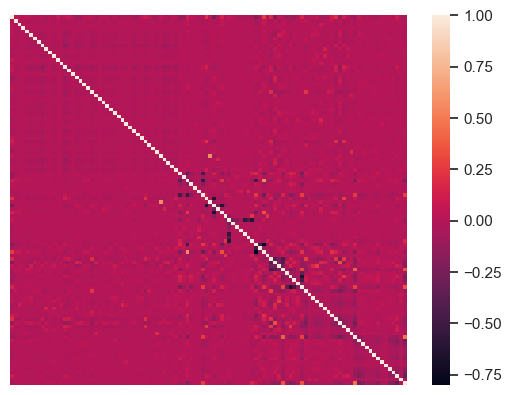

In [11]:
# Draw each cell as a scatter point with varying size and color
g = sns.heatmap(data=corr_mat, xticklabels=False, yticklabels=False)



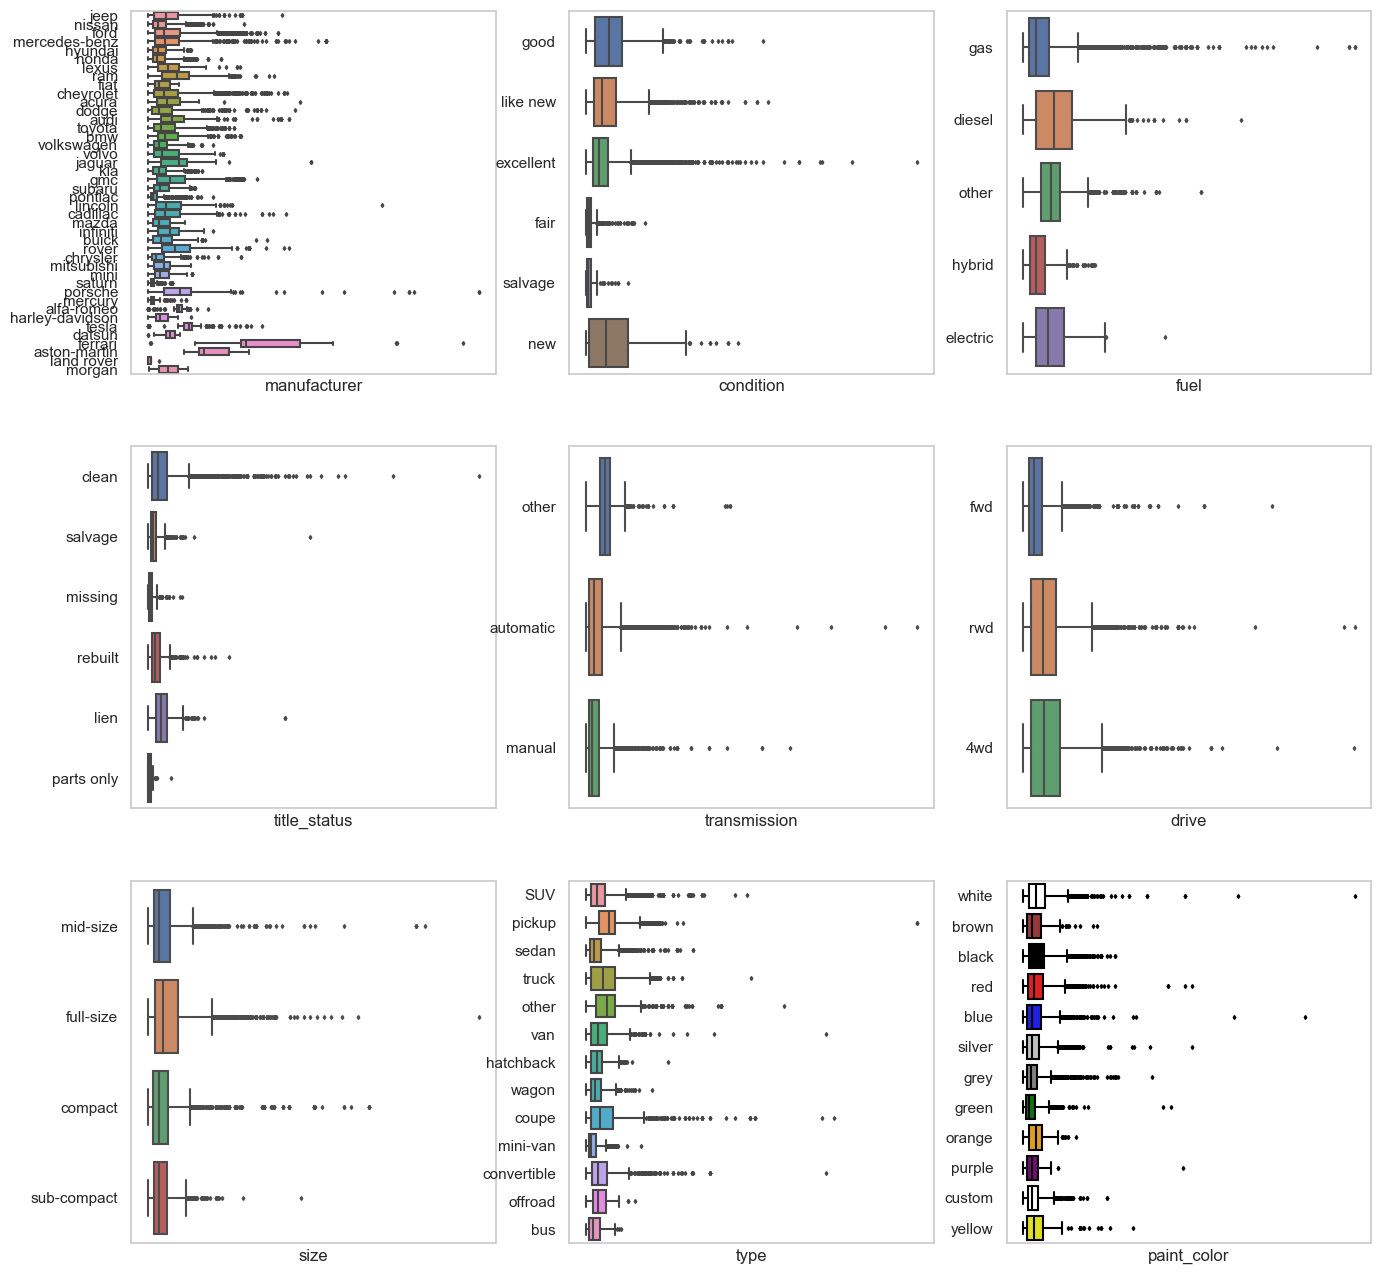

In [87]:
cars_data_cat = pd.read_parquet(os.path.join(data_folder, 'cleaned_data_categorical.parquet'))
categorical_columns_categorical = ['manufacturer', 'condition', 'fuel', 
                                   'title_status', 'transmission', 'drive', 
                                   'size', 'type', 'paint_color']

paint_color_dict = {cars_data_cat['paint_color'].value_counts().index[i]: cars_data_cat['paint_color'].value_counts().index[i] for i in range(len(cars_data_cat['paint_color'].value_counts().index))}
paint_color_dict['custom'] = 'white'

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 16))
for ax1 in range(3):
    for ax2 in range(3):
        axplot = sns.boxplot(cars_data_cat.iloc[np.random.choice(range(cars_data_cat.shape[0]), 100000)], 
                             y = categorical_columns_categorical[ax1*3 + ax2], x= 'price', 
                             ax= axs[ax1][ax2], fliersize= 2, width= 0.8, whis = 1.5,
                            palette= paint_color_dict if (ax1*3 + ax2 == 8) else None)
        axplot.set(ylabel = '')
        axplot.set(xlabel= categorical_columns_categorical[ax1*3 + ax2])
        axplot.set_xticks(ticks = [])
        # axplot.set_yticks(ticks = [])


In [86]:
categorical_columns_categorical[0]

'manufacturer'